### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns',None)

### Load Dataset

In [4]:
df = pd.read_csv('houseprice.csv')

print(df.shape)

(1460, 81)


In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The above housing price dataset contains 1460 rows and 81 columns/variables. 

**Let's analyse the dataset to identify the following:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: SalePrice

### Missing Values:

In [9]:
#find varibales with missing values
mis_val = [var for var in df.columns if df[var].isnull().sum()>0]

#display missing values list
df[mis_val].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
#mean of missig data
for var in mis_val:
    print(var, np.round(df[var].isnull().mean(), 3), ' %missing values')

LotFrontage 0.177  %missing values
Alley 0.938  %missing values
MasVnrType 0.005  %missing values
MasVnrArea 0.005  %missing values
BsmtQual 0.025  %missing values
BsmtCond 0.025  %missing values
BsmtExposure 0.026  %missing values
BsmtFinType1 0.025  %missing values
BsmtFinType2 0.026  %missing values
Electrical 0.001  %missing values
FireplaceQu 0.473  %missing values
GarageType 0.055  %missing values
GarageYrBlt 0.055  %missing values
GarageFinish 0.055  %missing values
GarageQual 0.055  %missing values
GarageCond 0.055  %missing values
PoolQC 0.995  %missing values
Fence 0.808  %missing values
MiscFeature 0.963  %missing values


### Relation between missing values and house price:

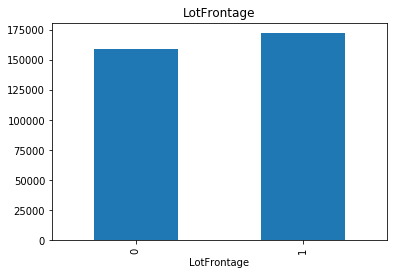

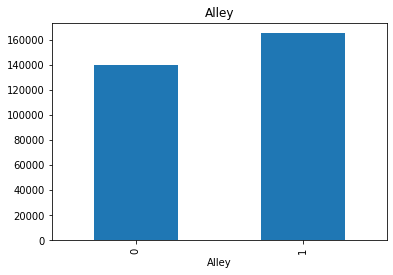

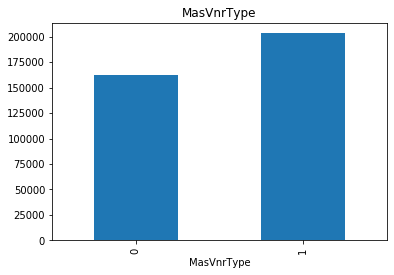

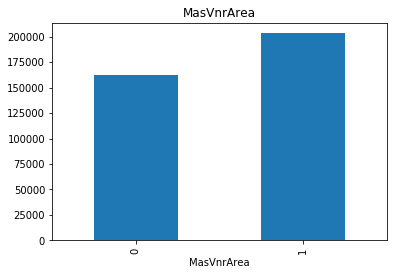

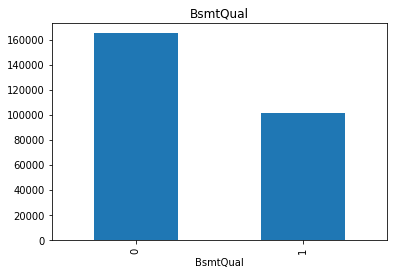

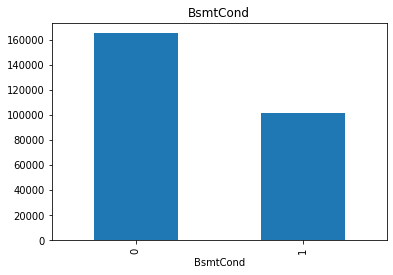

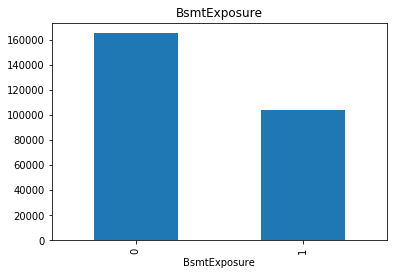

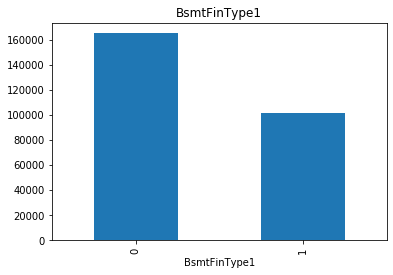

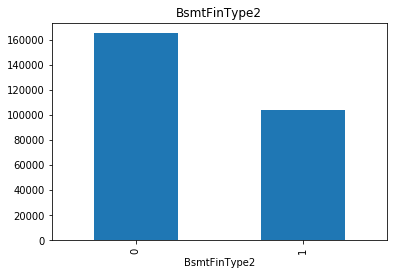

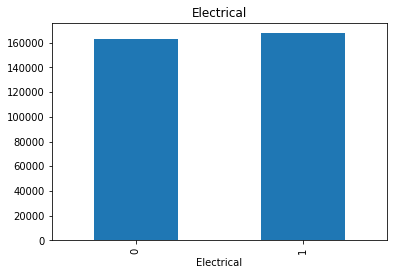

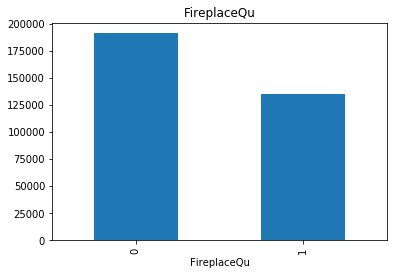

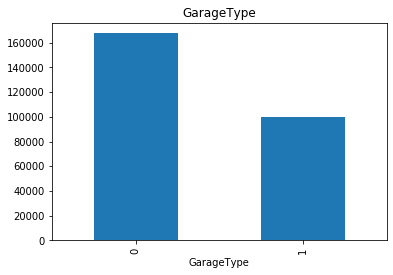

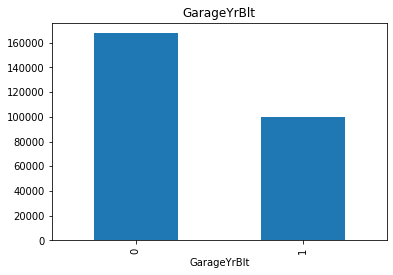

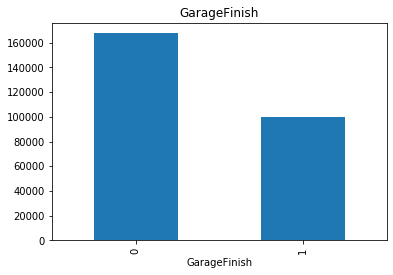

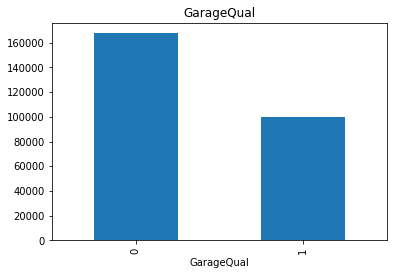

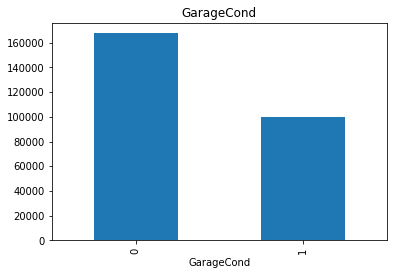

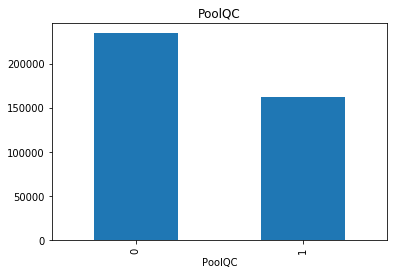

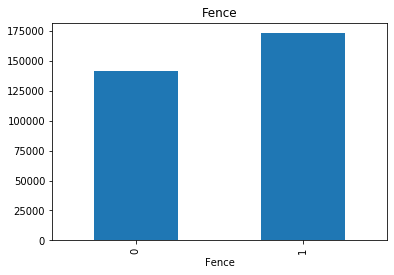

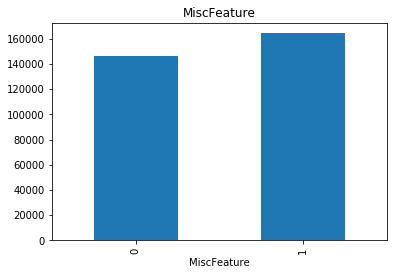

In [16]:
def analyze_missing_val(df,var):
    
    df = df.copy()
    
    df[var] = np.where(df[var].isnull(),1,0)
    
    #calculate mean price where value is missing
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in mis_val:
    analyze_missing_val(df,var)

The average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists.

### Numerical Variables:

In [17]:
num_vars = [var for var in df.columns if df[var].dtypes != 'O']
print('No of numerical varibales in the dataset : ',len(num_vars))

No of numerical varibales in the dataset :  38


In [18]:
df[num_vars].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


From the above view of the dataset, we notice the variable Id, which is an indicator of the house. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each house in the dataset. See below:

In [19]:
print('No of House Id labels: ',len(df.Id.unique()))
print('No of Houses in dataset: ',len(df))

No of House Id labels:  1460
No of Houses in dataset:  1460


### Temporal Variables:

We have 4 year variables in the dataset:

- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold

We generally don't use date variables in their raw format. Instead, we extract information from them. For example, we can capture the difference in years between the year the house was built and the year the house was sold.

In [21]:
year_var = [var for var in num_vars if 'Yr' in var or 'Year' in var ]
len(year_var), year_var

(4, ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'])

In [25]:
#Checking the values in year_var
for i in year_var:
    print(i, df[i].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

As expected, the values are years.

We can explore the evolution of the sale price with the years in which the house was sold:

Text(0, 0.5, 'Median House Price')

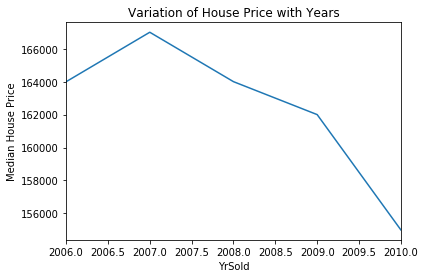

In [33]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.title('Variation of House Price with Years')
plt.ylabel('Median House Price')

There has been a drop in the value of the houses. That is unusual, in real life, house prices typically go up as years go by.

Let's go ahead and explore whether there is a relationship between the year variables and SalePrice. For this, we will capture the elapsed years between the Year variables and the year in which the house was sold:

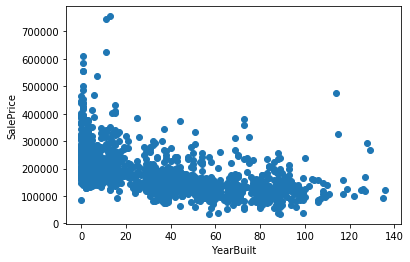

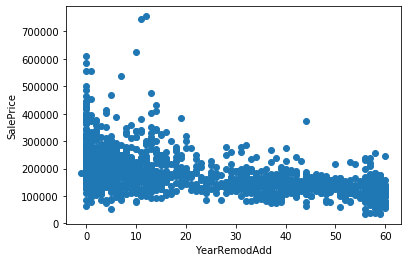

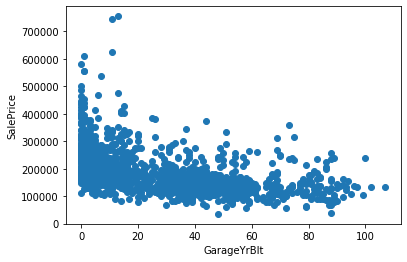

In [39]:
def analyze_year_var(df,var):
    
    df = df.copy()
    
    #calculate difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    
    plt.scatter(df[var],df['SalePrice'])
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in year_var:
    if var != 'YrSold':
        analyze_year_var(df,var)

We see that there is a tendency to a decrease in price, with older features. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price.

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

### Discrete Variables:

In [42]:
discrete_vars = [var for var in num_vars if len(df[var].unique())<20 and var not in year_var+['Id']]
print('No of discrete variables : ', len(discrete_vars))

No of discrete variables :  14


In [43]:
df[discrete_vars].head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


<b>Visualizing Discrete Variables:<b>

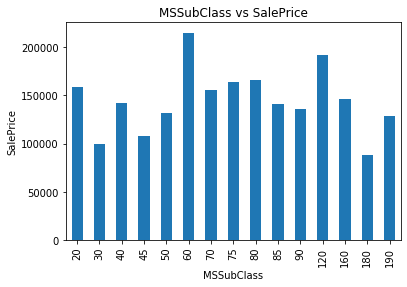

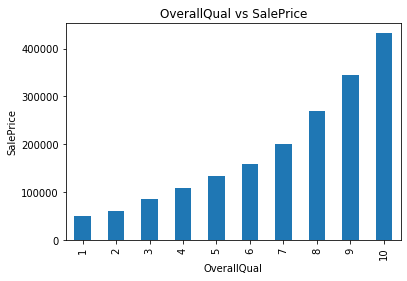

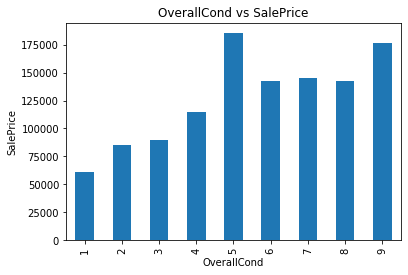

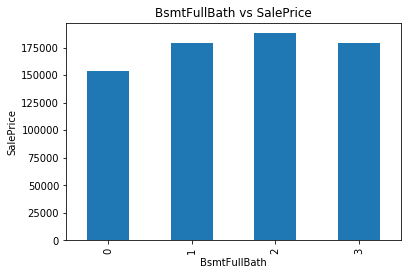

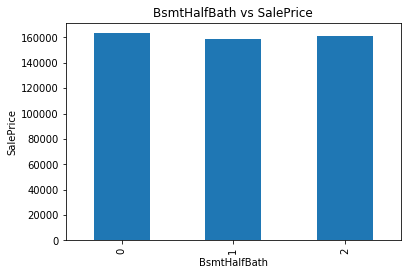

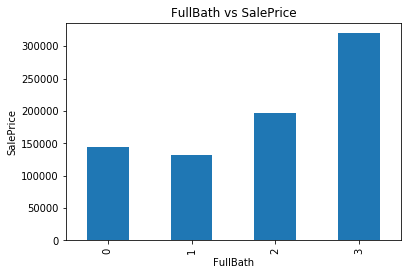

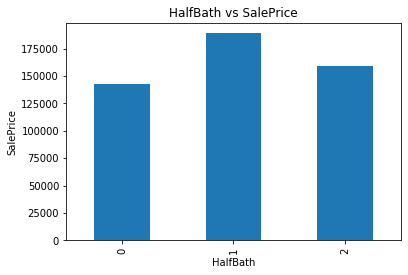

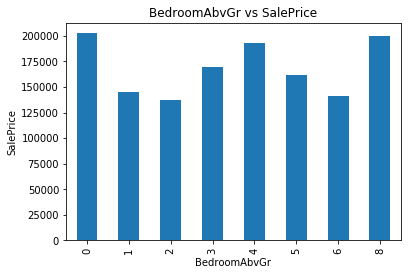

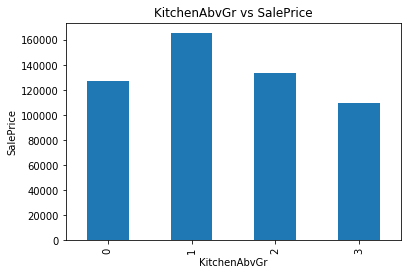

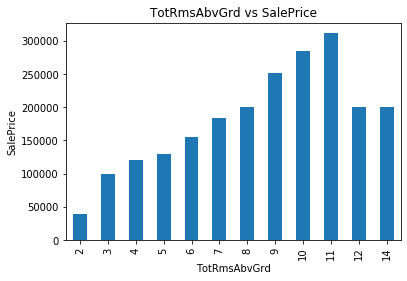

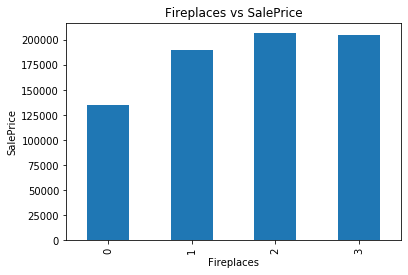

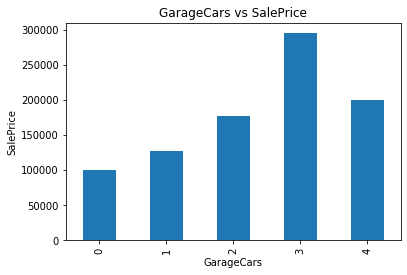

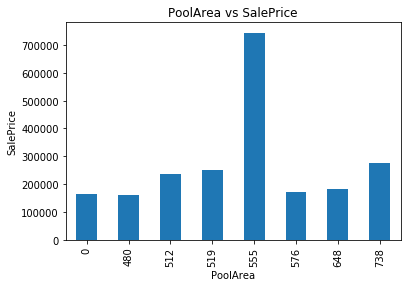

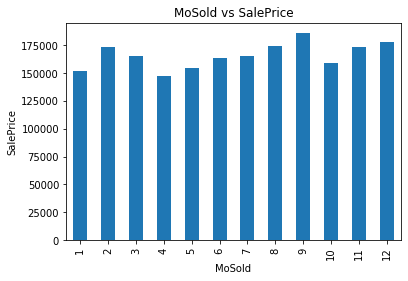

In [45]:
def analyze_discrete_vars(df,var):
    
    df = df.copy()
    
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var + ' vs SalePrice')
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in discrete_vars:
    analyze_discrete_vars(df,var)

There tend to be a relationship between the variables values and the SalePrice, but this relationship is not always monotonic.

For example, for OverallQual, there is a monotonic relationship: the higher the quality, the higher the SalePrice.

However, for OverallCond, the relationship is not monotonic. Clearly, some Condition grades, like 5, correlate with higher sale prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract maximum value for a linear model.

There are ways to re-arrange the order of the discrete values of a variable, to create a monotonic relationship between the variable and the target.

### Continuous Variables:

In [46]:
cont_vars = [var for var in num_vars if var not in discrete_vars+year_var+['Id']]
print('No of continuous variables : ', len(cont_vars))

No of continuous variables :  19


<b>Visualizing continuous variables<b>

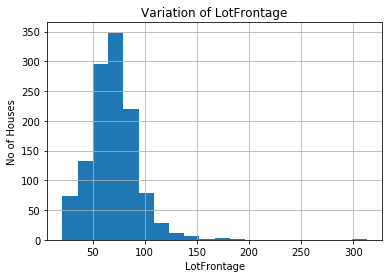

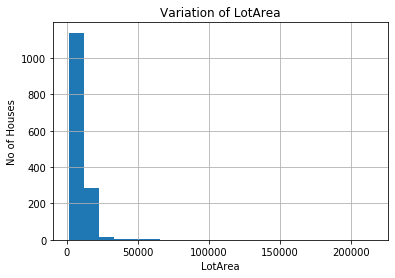

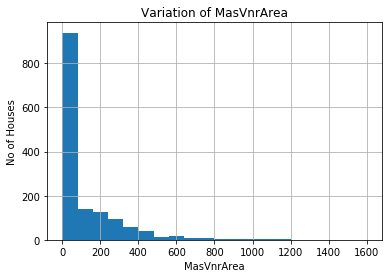

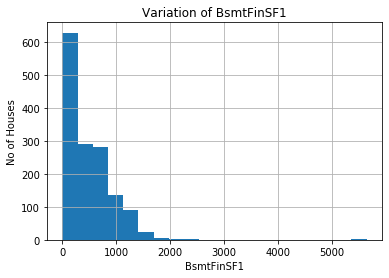

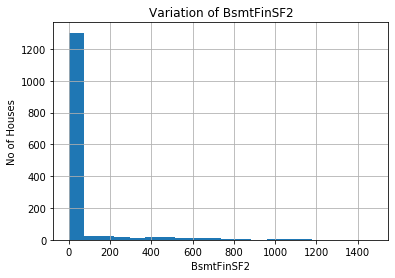

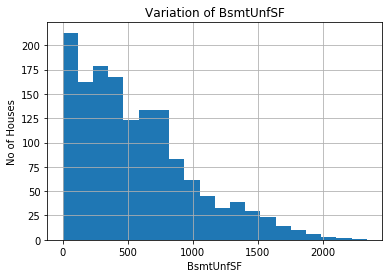

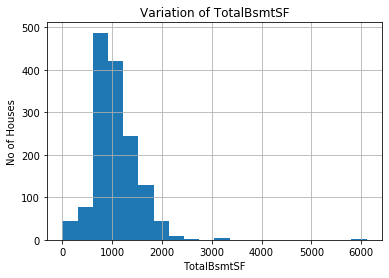

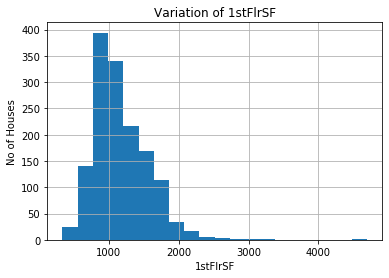

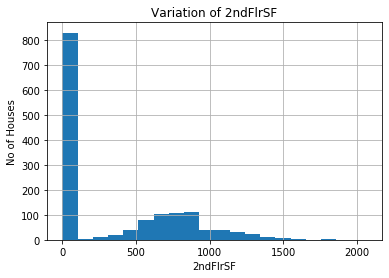

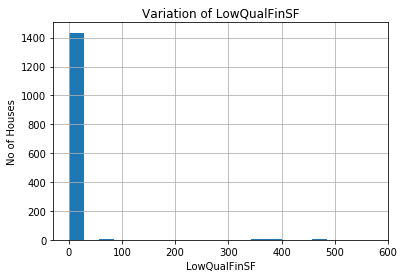

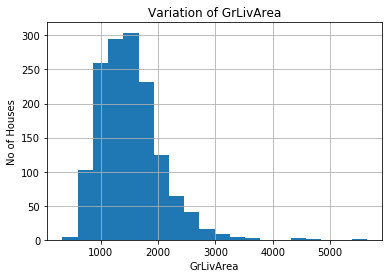

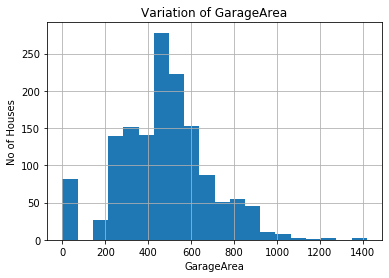

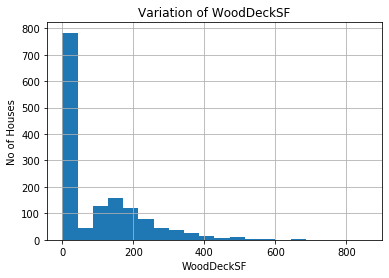

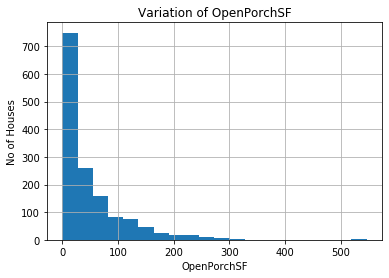

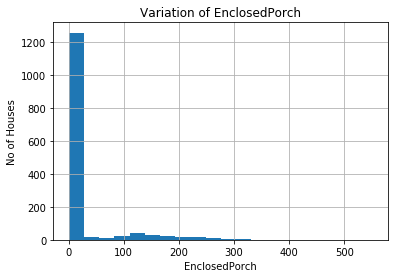

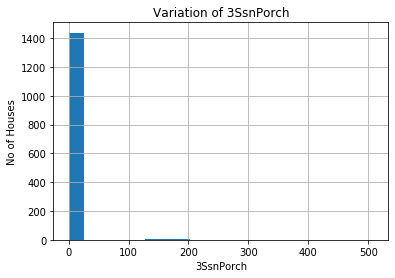

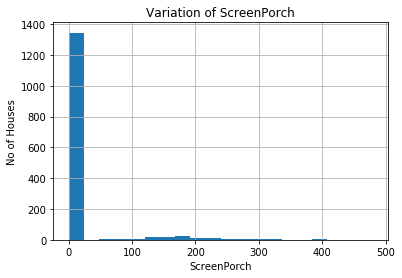

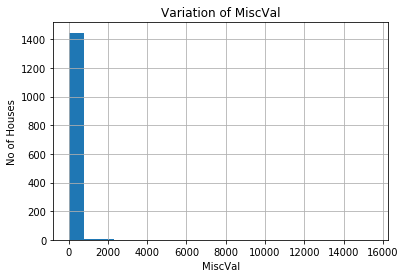

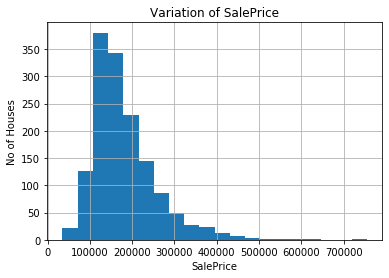

In [48]:
def analyze_cont_vars(df,var):
    
    df = df.copy()
    
    df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('No of Houses')
    plt.title('Variation of '+ var)
    plt.show()
    
for var in cont_vars:
    analyze_cont_vars(df,var)

The variables are not normally distributed, including the target variable 'SalePrice'.

To maximise performance of linear models, we need to account for non-Gaussian distributions. We will transform our variables as part of feature engineering

Let's evaluate if a logarithmic transformation of the variables returns values that follow a normal distribution:

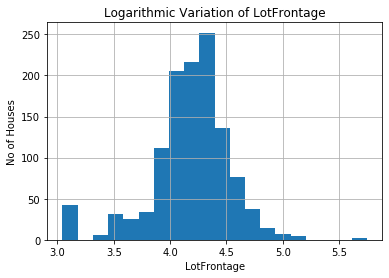

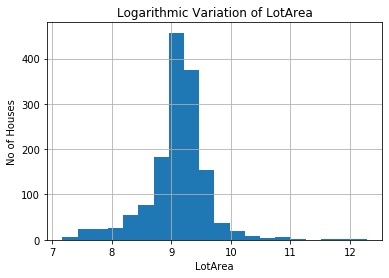

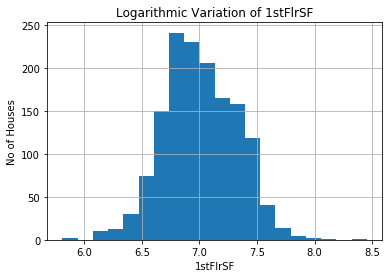

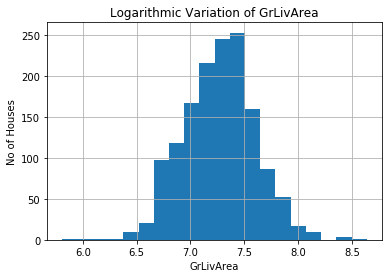

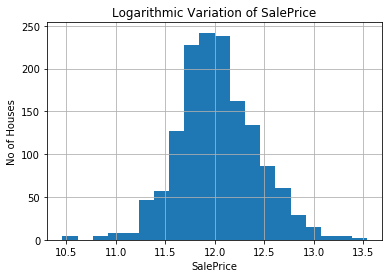

In [50]:
def analyze_log_variation(df,var):
    
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        #log Transformation of variables
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('No of Houses')
        plt.title('Logarithmic Variation of '+ var)
        plt.show()
        
for var in cont_vars:
    analyze_log_variation(df,var)

We get a better spread of the values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

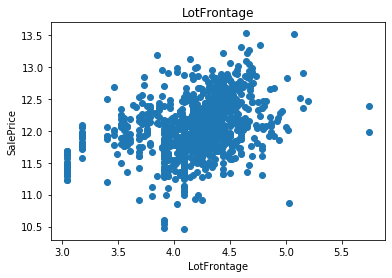

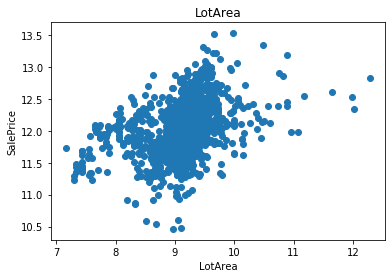

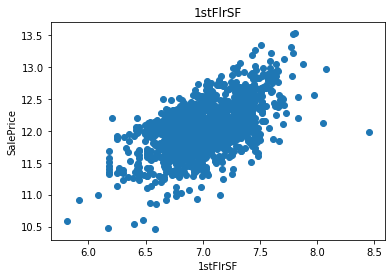

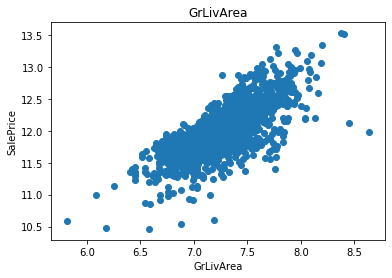

In [51]:
def analyze_cont_var_log(df,var):
    
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        #log Transformation of variables
        df[var] = np.log(df[var])
        df['SalePrice'] = np.log(df['SalePrice'])
        
        plt.scatter(df[var],df['SalePrice'])
        plt.xlabel(var)
        plt.ylabel('SalePrice')
        plt.title(var)
        plt.show()
        
for var in cont_vars:
    if var!='SalePrice':
        analyze_cont_var_log(df,var)
    

### Outliers:

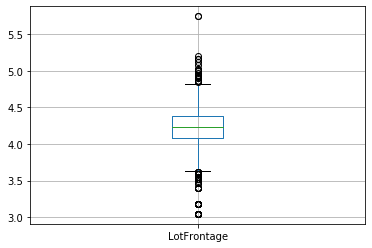

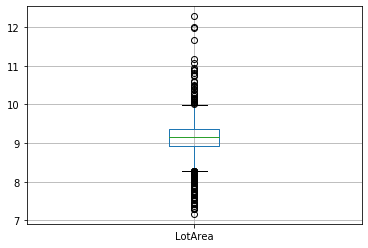

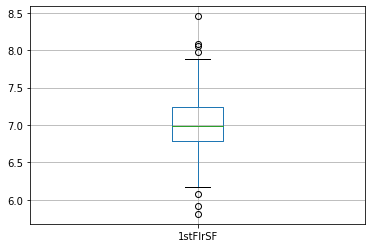

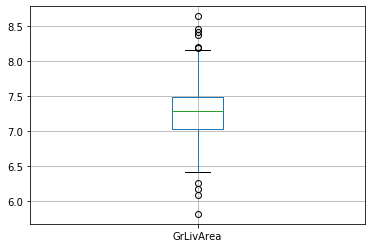

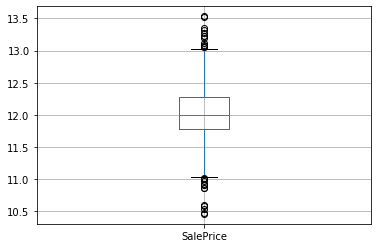

In [52]:
def analyze_outliers(df,var):
    
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.show()
        
for var in cont_vars:
    analyze_outliers(df,var)

### Categorical Variables:

In [53]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']
print('No of categorical variables : ',len(cat_vars))

No of categorical variables :  43


In [54]:
df[cat_vars].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


<b>Check cardinality of categorical variables:<b>

In [56]:
for var in cat_vars:
    print(var,len(df[var].unique()),' Categories')

MSZoning 5  Categories
Street 2  Categories
Alley 3  Categories
LotShape 4  Categories
LandContour 4  Categories
Utilities 2  Categories
LotConfig 5  Categories
LandSlope 3  Categories
Neighborhood 25  Categories
Condition1 9  Categories
Condition2 8  Categories
BldgType 5  Categories
HouseStyle 8  Categories
RoofStyle 6  Categories
RoofMatl 8  Categories
Exterior1st 15  Categories
Exterior2nd 16  Categories
MasVnrType 5  Categories
ExterQual 4  Categories
ExterCond 5  Categories
Foundation 6  Categories
BsmtQual 5  Categories
BsmtCond 5  Categories
BsmtExposure 5  Categories
BsmtFinType1 7  Categories
BsmtFinType2 7  Categories
Heating 6  Categories
HeatingQC 5  Categories
CentralAir 2  Categories
Electrical 6  Categories
KitchenQual 4  Categories
Functional 7  Categories
FireplaceQu 6  Categories
GarageType 7  Categories
GarageFinish 4  Categories
GarageQual 6  Categories
GarageCond 6  Categories
PavedDrive 3  Categories
PoolQC 4  Categories
Fence 5  Categories
MiscFeature 5  Categor

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

### Rare Labels:

In [58]:
def analyze_rare_labels(df, var, rare_perc):
    
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyze_rare_labels(df, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some of the categorical variables show multiple labels that are present in less than 1% of the houses. We will have to perform feature engineering on them. Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. That is why we want to remove them.

<b>Relationship between categorical variables and house price<b>

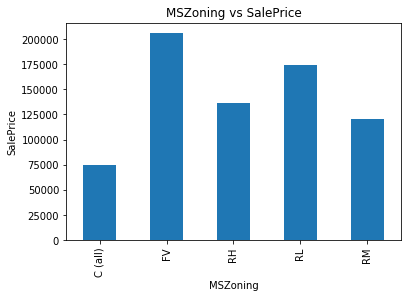

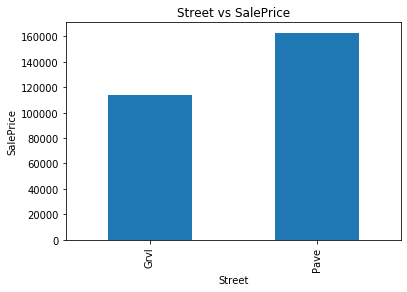

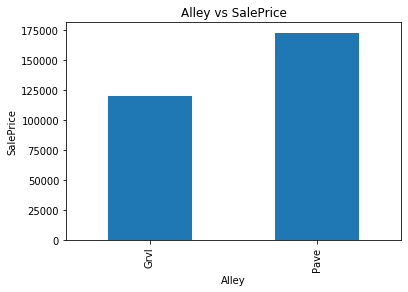

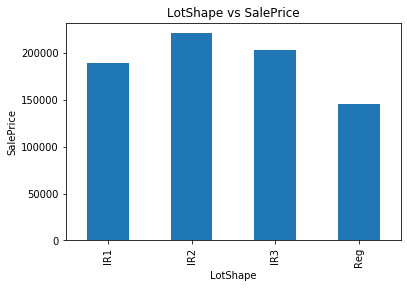

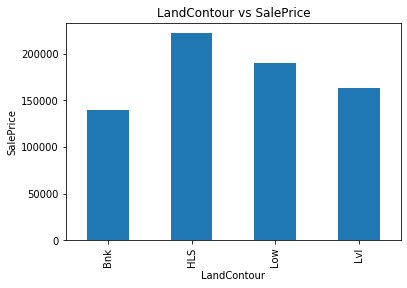

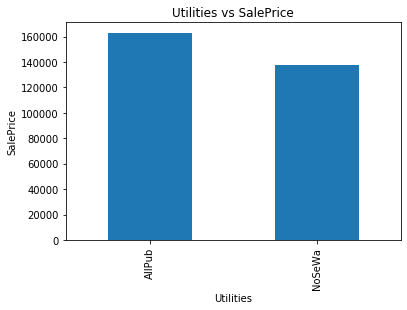

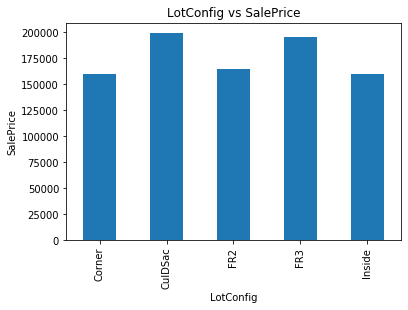

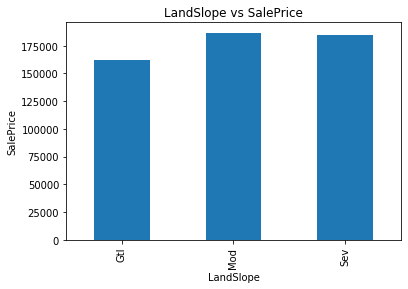

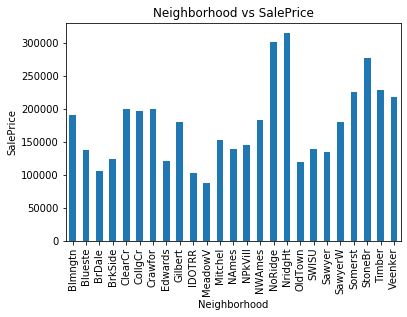

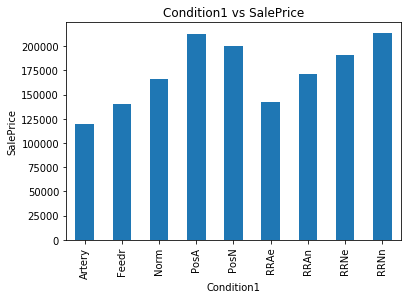

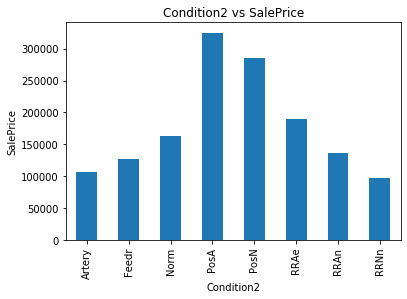

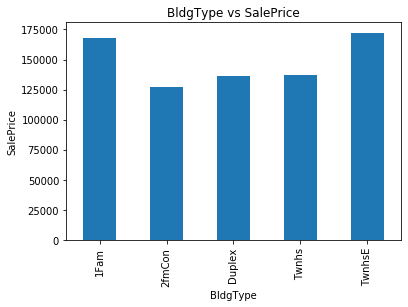

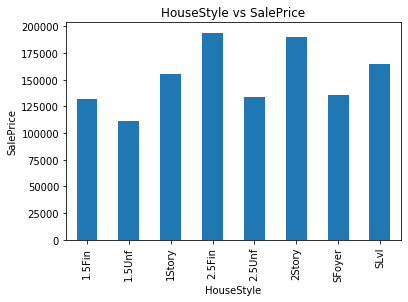

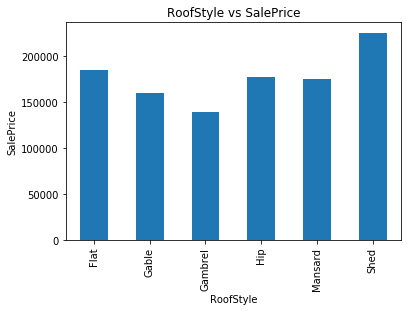

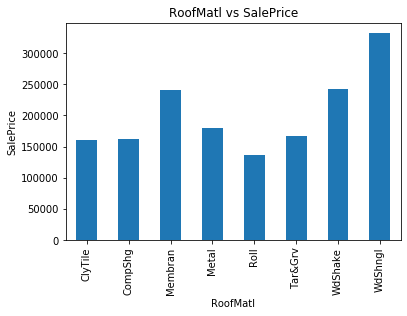

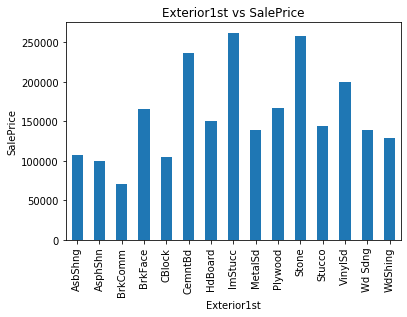

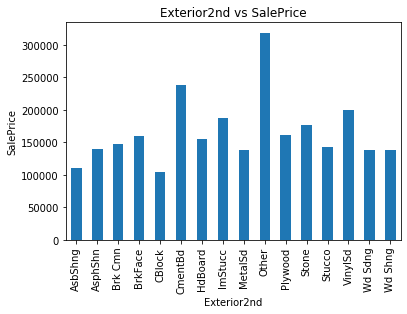

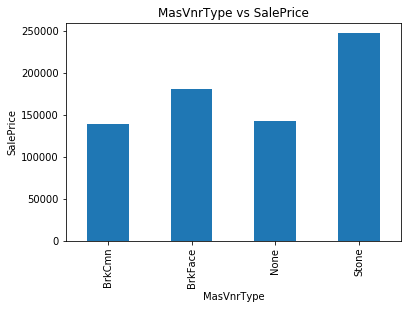

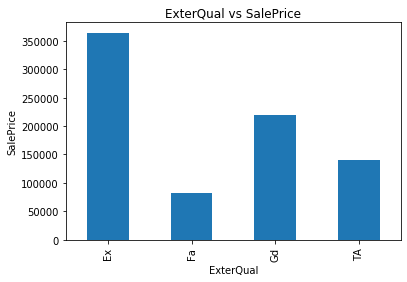

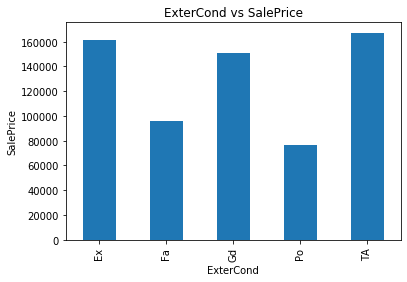

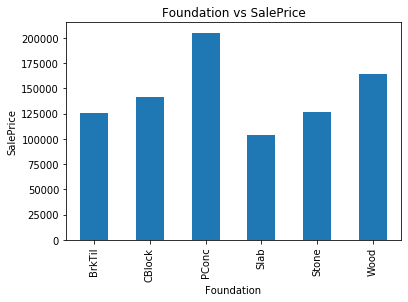

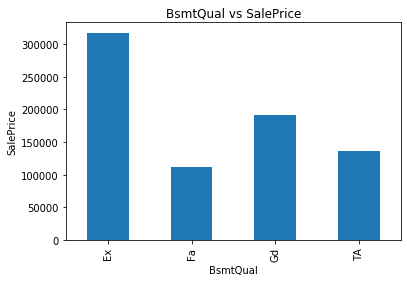

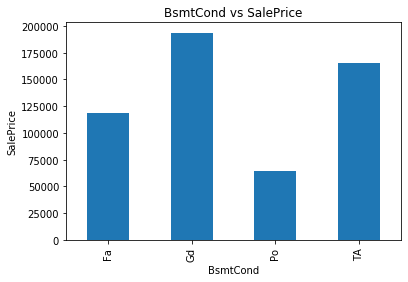

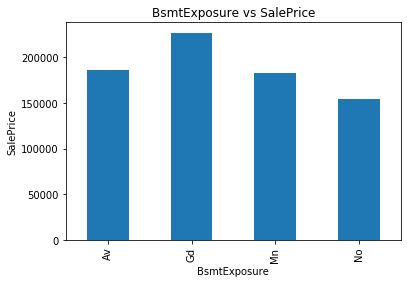

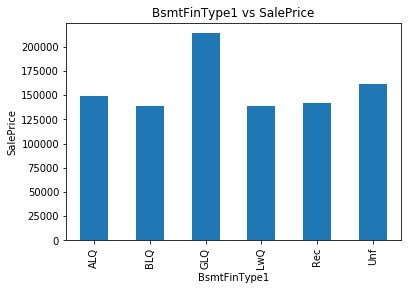

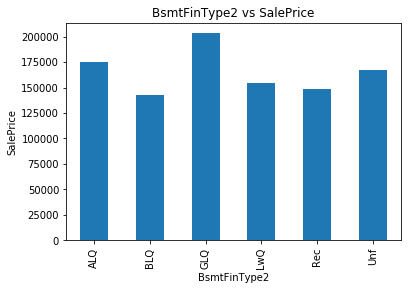

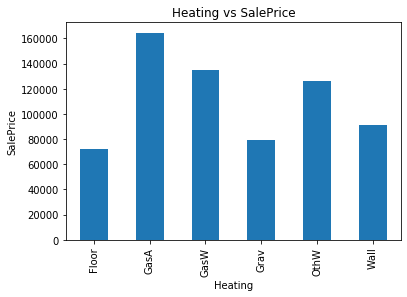

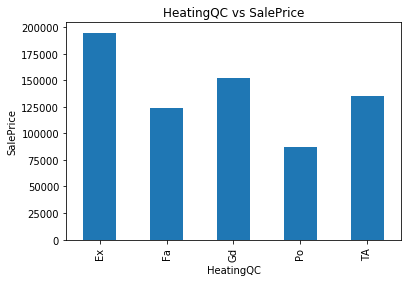

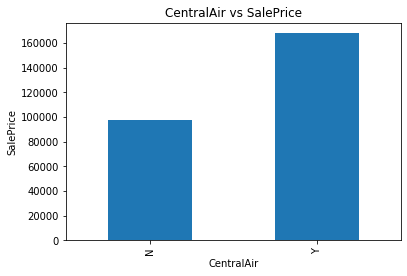

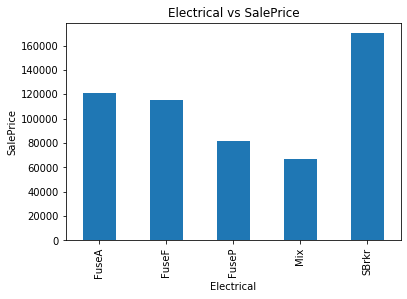

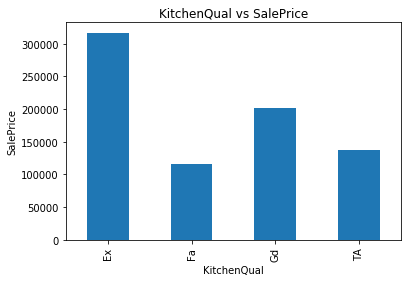

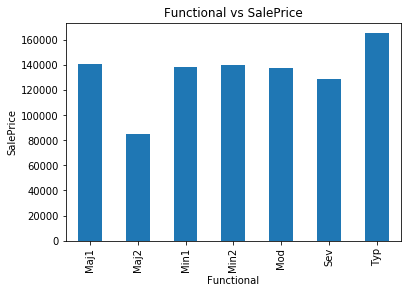

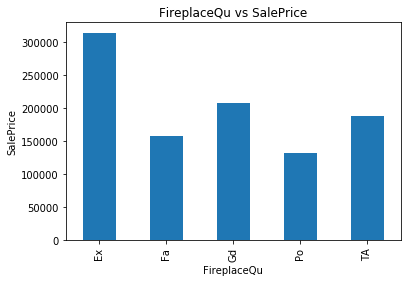

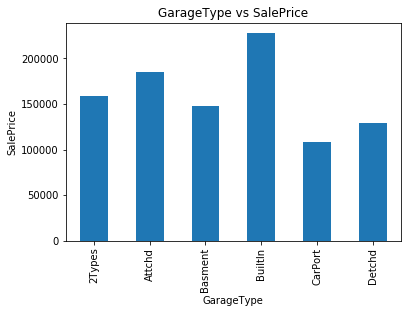

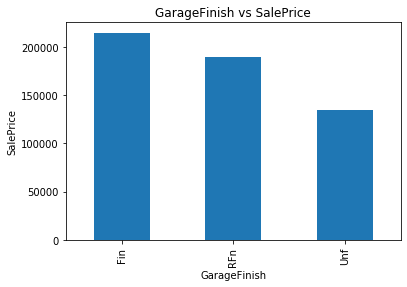

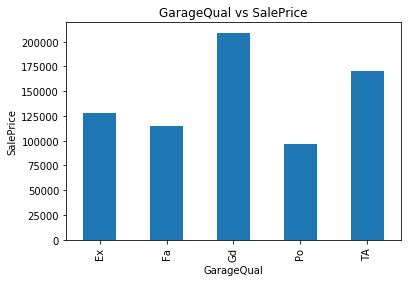

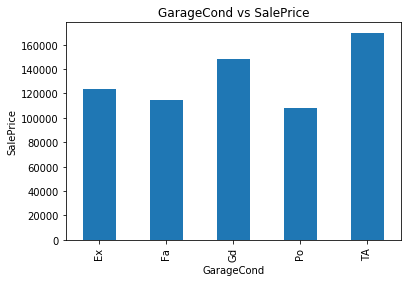

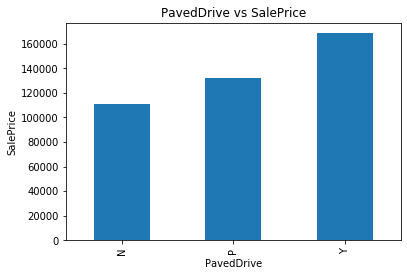

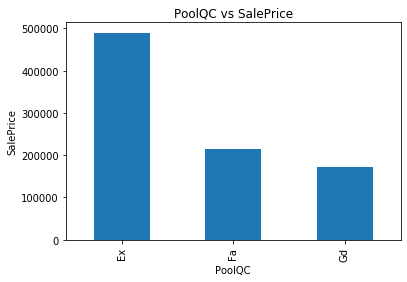

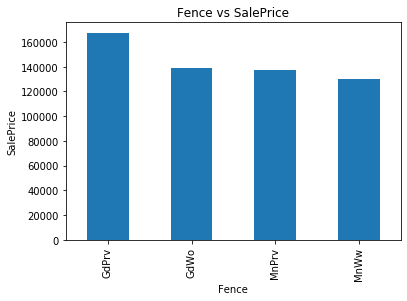

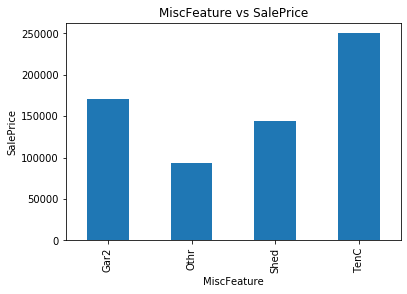

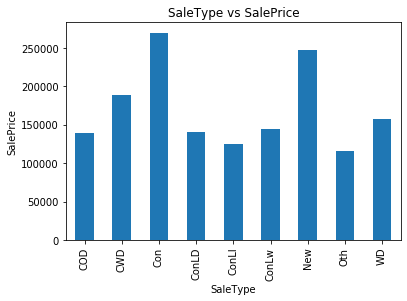

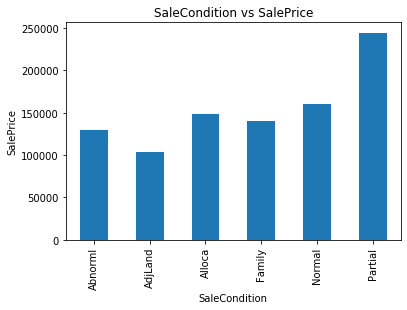

In [59]:
for var in cat_vars:
    analyze_discrete_vars(df,var)